In [1]:
# script for resampling fabdem down to uavsar resolution and extent

import numpy as np
import rasterio as rio
from rasterio.enums import Resampling
import matplotlib.pyplot as plt
import rioxarray as rxr # for the extension to load
import xarray as xr

In [37]:
# from https://corteva.github.io/rioxarray/stable/examples/reproject_match.html
def print_raster(raster):
    print(
        f"shape: {raster.rio.shape}\n"
        f"resolution: {raster.rio.resolution()}\n"
        f"bounds: {raster.rio.bounds()}\n"
        f"sum: {raster.sum().item()}\n"
        f"CRS: {raster.rio.crs}\n"
    )

In [68]:
# import dem from the geolocation function
uavsar_dem_raw =rxr.open_rasterio('/Users/jacktarricone/ch1_jemez_data/new_py_inc/lkv.z.tif')
uavsar_dem = uavsar_dem_raw.where(uavsar_dem != 0)
uavsar_dem.spatial_ref

<xarray.DataArray 'spatial_ref' ()>
array(0)
Coordinates:
    spatial_ref  int64 0
Attributes:
    crs_wkt:                      GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...
    semi_major_axis:              6378137.0
    semi_minor_axis:              6356752.314245179
    inverse_flattening:           298.257223563
    reference_ellipsoid_name:     WGS 84
    longitude_of_prime_meridian:  0.0
    prime_meridian_name:          Greenwich
    geographic_crs_name:          WGS 84
    grid_mapping_name:            latitude_longitude
    spatial_ref:                  GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...
    GeoTransform:                 -106.56379699707031 5.556e-05 0.0 36.105346...

In [61]:
# import fabdem naheem downloaded from gee
fabdem = rxr.open_rasterio('/Users/jacktarricone/ch1_jemez_data/new_py_inc/jemez_fabdem.tif')
fabdem.spatial_ref

<xarray.DataArray 'spatial_ref' ()>
array(0)
Coordinates:
    spatial_ref  int64 0
Attributes:
    crs_wkt:                      GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...
    semi_major_axis:              6378137.0
    semi_minor_axis:              6356752.314245179
    inverse_flattening:           298.257223563
    reference_ellipsoid_name:     WGS 84
    longitude_of_prime_meridian:  0.0
    prime_meridian_name:          Greenwich
    geographic_crs_name:          WGS 84
    grid_mapping_name:            latitude_longitude
    spatial_ref:                  GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...
    GeoTransform:                 -106.90553752262667 0.00026949458523585647 ...

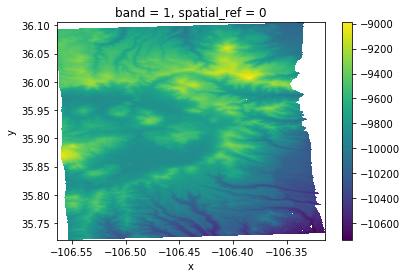

In [69]:
# plot uavsar
fig, axes = plt.subplots()
uavsar_dem.plot()
plt.draw()

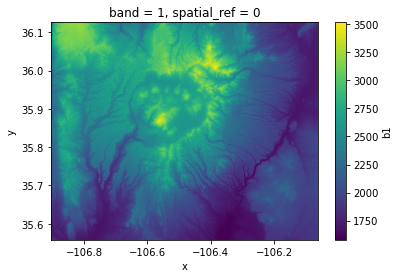

In [70]:
# plot fabdem
fig, axes = plt.subplots()
fabdem.plot()
plt.draw()

In [81]:
print("FABDEM:\n----------------\n")
print_raster(fabdem)
print("UAVSAR:\n----------------\n")
print_raster(uavsar_dem)

FABDEM:
----------------

shape: (2108, 3135)
resolution: (0.00026949458523585647, -0.00026949458523585647)
bounds: (-106.90553752262667, 35.55792405977461, -106.06067199791227, 36.12601864545179)
sum: 15122113536.0
CRS: EPSG:4326

UAVSAR:
----------------

shape: (6931, 4486)
resolution: (5.556e-05, -5.556e-05)
bounds: (-106.56379699707031, 35.72026031968749, -106.31455483707032, 36.1053466796875)
sum: -270390050816.0
CRS: EPSG:4326



In [73]:
# uavsar_dem lat lon bounds
bounds = uavsar_dem.rio.bounds()
print(bounds)

(-106.56379699707031, 35.72026031968749, -106.31455483707032, 36.1053466796875)


In [74]:
# define 
min_lon = bounds[0]
min_lat = bounds[1]
max_lon = bounds[2]
max_lat = bounds[3]

In [84]:
# crop fabdem to uavsar extent
fabdem_crop = fabdem.rio.clip_box(minx=min_lon, miny=min_lat, maxx=max_lon, maxy=max_lat)

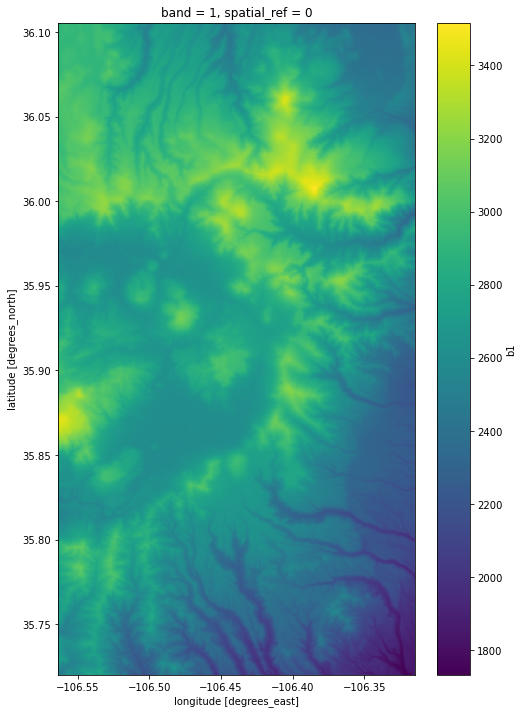

In [85]:
# test plot
fig, axes = plt.subplots(1, figsize=(8,12))
fabdem_crop.plot()
plt.draw()

In [82]:
# assign cords
fabdem_resamp = fabdem_crop.rio.reproject_match(uavsar_dem)

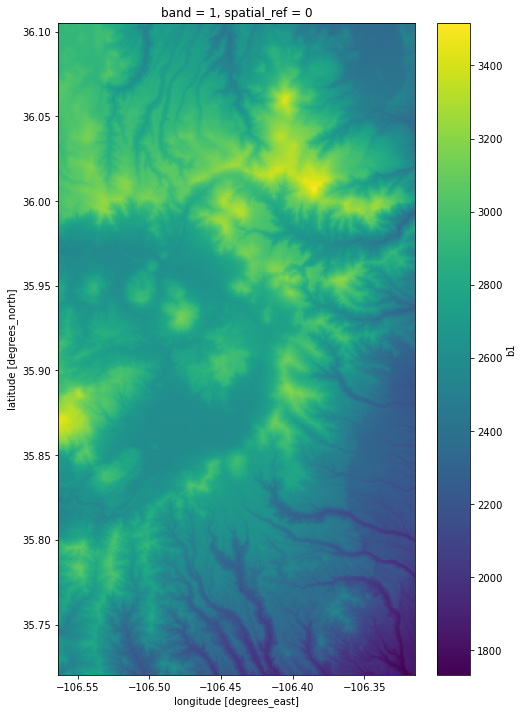

In [86]:
# test plot
fig, axes = plt.subplots(1, figsize=(8,12))
fabdem_resamp.plot()
plt.draw()

In [83]:
print("Resampled FABDEM:\n----------------\n")
print_raster(fabdem_resamp)
print("UAVSAR:\n----------------\n")
print_raster(uavsar_dem)

Resampled FABDEM:
----------------

shape: (6931, 4486)
resolution: (5.5560000000000356e-05, -5.556000000000038e-05)
bounds: (-106.56379699707031, 35.72026031968749, -106.31455483707032, 36.1053466796875)
sum: 83356467200.0
CRS: EPSG:4326

UAVSAR:
----------------

shape: (6931, 4486)
resolution: (5.556e-05, -5.556e-05)
bounds: (-106.56379699707031, 35.72026031968749, -106.31455483707032, 36.1053466796875)
sum: -270390050816.0
CRS: EPSG:4326



In [ ]:
ds1_mask_nan = ds1.where(mask, np.nan)  

In [92]:
fabdem_resamp.data[np.isnan(uavsar_dem.data)] = np.nan

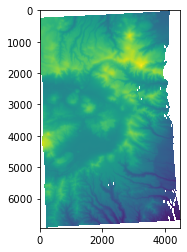

In [95]:
plt.imshow(fabdem_resamp.data[0])